In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dataset_Facebook.csv', sep=';')

In [3]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


### Data Subset

In [4]:
subset1 = df[['Post Month','Page total likes']]
subset2 = df[['like','share']]

In [5]:
subset1.head()

,Post Month,Page total likes
0,12,139441
1,12,139441
2,12,139441
3,12,139441
4,12,139441


In [6]:
subset2.head()

,like,share
0,79.0,17.0
1,130.0,29.0
2,66.0,14.0
3,1572.0,147.0
4,325.0,49.0


### Merge Data

In [7]:
merged_data = pd.merge(subset1, subset2, left_on='Post Month', right_on='like')

In [8]:
merged_data.head()

,Post Month,Page total likes,like,share
0,12,139441,12.0,1.0
1,12,139441,12.0,2.0
2,12,139441,12.0,1.0
3,12,139441,12.0,2.0
4,12,139441,12.0,1.0


### Sorting

In [9]:
merged_data.sort_values(by='Page total likes').head()

,Post Month,Page total likes,like,share
1166,1,81370,1.0,2.0
1164,1,81370,1.0,2.0
1165,1,81370,1.0,2.0
1163,1,81370,1.0,2.0
1162,1,85093,1.0,2.0


### Transposing

In [10]:
merged_data.transpose().head()

,0,1,2,3,4,5,6,7,8,9,...,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166
Post Month,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Page total likes,139441.0,139441.0,139441.0,139441.0,139441.0,139441.0,139441.0,139441.0,139441.0,139441.0,...,85979.0,85979.0,85979.0,85093.0,85093.0,85093.0,81370.0,81370.0,81370.0,81370.0
like,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
share,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


### shape and reshape

In [11]:
df.shape

(500, 19)

In [12]:
reshaped = pd.melt(df, id_vars=['Type'], value_vars=['comment'])

In [13]:
reshaped.head()

,Type,variable,value
0,Photo,comment,4
1,Status,comment,5
2,Photo,comment,0
3,Photo,comment,58
4,Photo,comment,19


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

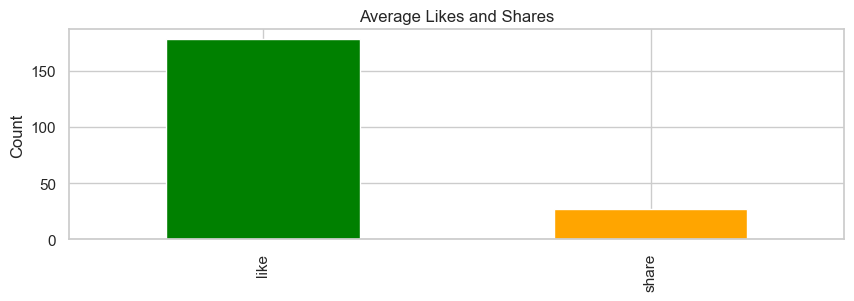

In [18]:
# Set style
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# Bar Plot: Average Likes vs Shares
plt.subplot(2, 1, 2)
interaction_means = df[['like', 'share']].mean()
interaction_means.plot(kind='bar', color=['green', 'orange'])
plt.title('Average Likes and Shares')
plt.ylabel('Count')

plt.show()

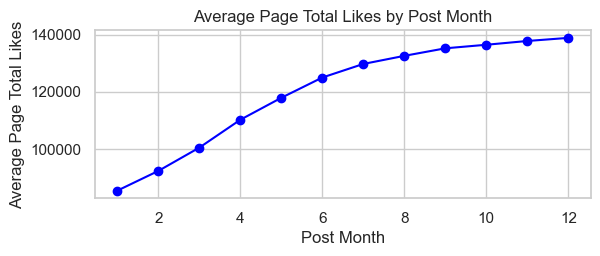

In [17]:
# Line Plot: Avg Page Likes over Post Month
plt.subplot(2, 1, 1)
monthly_likes = df.groupby('Post Month')['Page total likes'].mean()
monthly_likes.plot(kind='line', marker='o', color='blue')
plt.title('Average Page Total Likes by Post Month')
plt.xlabel('Post Month')
plt.ylabel('Average Page Total Likes')

plt.show()

In [39]:
correlation=merged_data.corr(numeric_only=True)

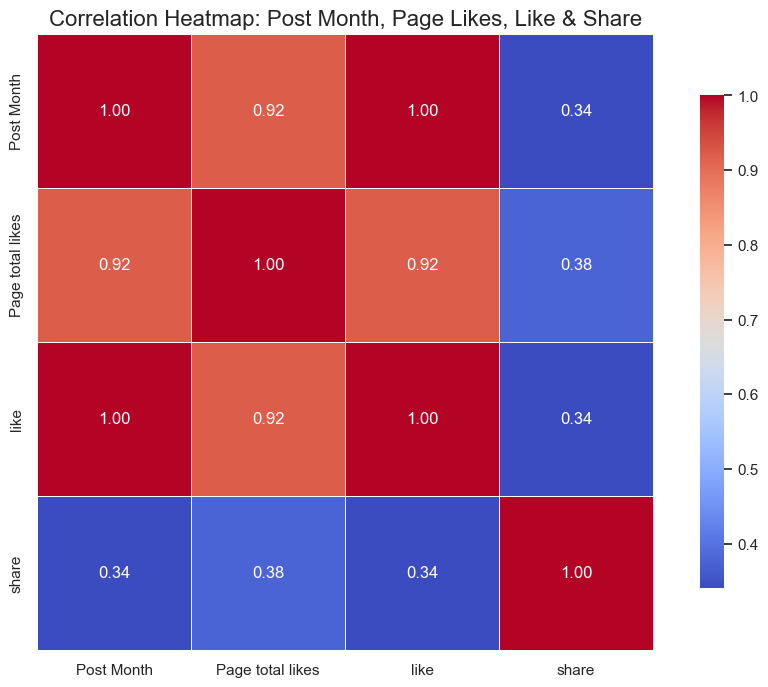

In [40]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})

# Add title
plt.title("Correlation Heatmap: Post Month, Page Likes, Like & Share", fontsize=16)

plt.show()